<a href="https://colab.research.google.com/github/hargurjeet/Recommedation-Systems/blob/main/Books_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Books Recommendations Systems**

Building recommender systems today requires specialized expertise in analytics, machine learning and software engineering, and learning new skills and tools is difficult and time-consuming. In this notebook, we will start from scratch, covering some basic fundamental techniques and implementations in Python. I build the recommedation system using the **Weighted Average** technique.

# **Table Of Contents**<a name="top"></a>


---



---


  1. [About the Dataset](#1)
  2. [Expainatory Data Analysis](#2)
  3. [Implementing the Weighted Averages](#3)
  4. [Recommendation based on Weighted Averages](#4)
  5. [Recommendation based on Weighted Averages and Text Reviews](#5)
  6. [Summary](#6)
  7. [Future Work](#7)
  8. [References](#8)

# <font color="darkslateblue" size=+2.0><b>1: AboutDataset</b></font> <a name="1"></a>


---
<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

This file contains the detailed information about the books, primarily. Detailed description for each column can be found alongside.

- bookID: A unique Identification number for each book.
- title: The name under which the book was published.
- authors: Names of the authors of the book. Multiple authors are delimited with
- average_rating: The average rating of the book received in total.
- isbn: Another unique number to identify the book, the International Standard Book Number.
- isbn13: A 13-digit ISBN to identify the book, instead of the standard 11-digit ISBN.
- language_code: Helps understand what is the primary language of the book. For instance, eng is standard for English
- num_pages: Number of pages the book contains.
- reatings_count: Total number of ratings the book received.
- text_reviews_count: Total number of written text reviews the book received.



In [1]:
import numpy as np
import pandas as pd

In [2]:
# Upload kaggle.jason
# please follow this link incase not aware: https://www.kaggle.com/general/74235
from google.colab import files
files.upload()

! pip install opendatasets --upgrade
import opendatasets as od

dataset_url = 'https://www.kaggle.com/jealousleopard/goodreadsbooks'
od.download(dataset_url)

Saving kaggle.json to kaggle.json


100%|██████████| 622k/622k [00:00<00:00, 72.2MB/s]

In [3]:
df = pd.read_csv('/content/goodreadsbooks/books.csv', error_bad_lines=False)
df.head(2)

b'Skipping line 3350: expected 12 fields, saw 13\nSkipping line 4704: expected 12 fields, saw 13\nSkipping line 5879: expected 12 fields, saw 13\nSkipping line 8981: expected 12 fields, saw 13\n'


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.


# <font color="darkslateblue" size=+2.0><b>2: Exploratory Data Analysis</b></font> <a name="2"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

Now we do the exploratory data analysis to get insights

In [4]:
df.shape

(11123, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


The dataset seems to have no null values. This is good !!!

Let us try understand the rating trend

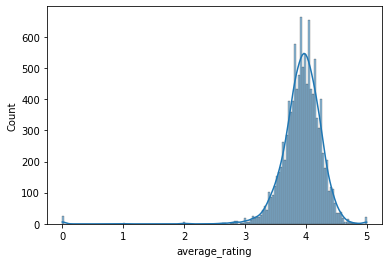

In [6]:
import seaborn as sns
sns.histplot(data=df, x="average_rating", kde=True);

It is observed, the rating spread is from 3 to 5 and very few books are rated below 3.

Extracting relvant features from the original dataframe

In [11]:
df_relevant_data = df[['title','average_rating','ratings_count','text_reviews_count']]
df_relevant_data.head(2)

,title,average_rating,ratings_count,text_reviews_count
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,27591
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,29221


# <font color="darkslateblue" size=+2.0><b>3: Implementing Weighted Averages</b></font> <a name="3"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

**Using Weighted average for each Books's Average Rating**
<br> **W = Rv + Cm/(v + m)**

where
<br> W= Weighted Rating
<br> R = Average of the Books rating 0 to 5
<br> v = No of votes for the books
<br> m = minimum no of votes to be listed
<br> C = the mean rating acorss the whole report


In [12]:
# Calculate all the components based on the above formula
v=df_relevant_data['ratings_count']
R=df_relevant_data['average_rating']
C=df_relevant_data['average_rating'].mean()
m=df_relevant_data['ratings_count'].quantile(0.70)

In [13]:
df_relevant_data['weighted_average']=((R*v)+ (C*m))/(v+m)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_relevant_data.head()

,title,average_rating,ratings_count,text_reviews_count,weighted_average
0,Harry Potter and the Half-Blood Prince (Harry ...,4.57,2095690,27591,4.569008
1,Harry Potter and the Order of the Phoenix (Har...,4.49,2153167,29221,4.489156
2,Harry Potter and the Chamber of Secrets (Harry...,4.42,6333,244,4.254414
3,Harry Potter and the Prisoner of Azkaban (Harr...,4.56,2339585,36325,4.559125
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,164,4.718051


# <font color="darkslateblue" size=+2.0><b>4: Recommendation based on weighted score</b></font> <a name="4"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

In [16]:

books_sorted_ranking=df_relevant_data.sort_values('weighted_average',ascending=False)
books_sorted_ranking

,title,average_rating,ratings_count,text_reviews_count,weighted_average
6587,The Complete Calvin and Hobbes,4.82,32213,930,4.738274
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,164,4.718051
6589,It's a Magical World (Calvin and Hobbes #11),4.76,23875,303,4.660409
6,Harry Potter Collection (Harry Potter #1-6),4.73,28242,808,4.647325
6588,The Calvin and Hobbes Tenth Anniversary Book,4.63,49122,368,4.586520
...,...,...,...,...,...
1940,The Mermaid Chair,3.13,68363,5816,3.166744
668,The Jane Austen Book Club,3.08,57720,3535,3.125839
6630,Lost,2.82,13152,904,3.042034
8812,Citizen Girl,2.40,5415,577,2.977993


This is the list of most favored books based on the weighted scores

# <font color="darkslateblue" size=+2.0><b>5: Recommendation based on weighted avg and text reviews</b></font> <a name="5"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

Recommendation based on scaled weighted average and text reviews  (Priority is given 50% to both)

<br> Data normalization is performed as scale down the values of both the fields

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
books_scaled_df=scaling.fit_transform(books_sorted_ranking[['weighted_average','text_reviews_count']])
books_normalized_df=pd.DataFrame(books_scaled_df,columns=['weighted_average','text_reviews_count'])
books_normalized_df.head()

,weighted_average,text_reviews_count
0,1.000000,0.009866
1,0.988649,0.001740
2,0.956295,0.003214
3,0.948951,0.008572
4,0.914821,0.003904


In [18]:
books_sorted_ranking[['normalized_weight_average','normalized_text_reviews']]= books_normalized_df

In [19]:
books_sorted_ranking.head()

,title,average_rating,ratings_count,text_reviews_count,weighted_average,normalized_weight_average,normalized_text_reviews
6587,The Complete Calvin and Hobbes,4.82,32213,930,4.738274,0.548068,0.000117
4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,4.78,41428,164,4.718051,0.914821,0.003904
6589,It's a Magical World (Calvin and Hobbes #11),4.76,23875,303,4.660409,0.548067,0.000011
6,Harry Potter Collection (Harry Potter #1-6),4.73,28242,808,4.647325,0.912263,0.003076
6588,The Calvin and Hobbes Tenth Anniversary Book,4.63,49122,368,4.586520,0.548067,0.000053


In [20]:
books_sorted_ranking['score'] = books_sorted_ranking['normalized_weight_average'] * 0.5 + books_sorted_ranking['normalized_text_reviews'] * 0.5
books_scored_df = books_sorted_ranking.sort_values(['score'], ascending=False)
books_scored_df[['title', 'normalized_weight_average', 'normalized_text_reviews', 'score']].head(20)

,title,normalized_weight_average,normalized_text_reviews,score
62,What to Expect the First Year (What to Expect),0.792762,0.921668,0.857215
11015,Miss or Mrs?/ The Haunted Hotel/ The Guilty River,0.355616,1.000000,0.677808
9,The Hitchhiker's Guide to the Galaxy (Hitchhik...,0.899444,0.385350,0.642397
697,Daily Reflections For Highly Effective People:...,0.658352,0.600477,0.629414
205,Bowling Alone: The Collapse and Revival of Ame...,0.725606,0.508683,0.617144
175,The Crying of Lot 49,0.736399,0.489853,0.613126
8,The Ultimate Hitchhiker's Guide to the Galaxy ...,0.904992,0.292696,0.598844
963,Greek Tragedies Volume 2,0.635900,0.559688,0.597794
34,Changeling (Changeling #1),0.820965,0.368026,0.594496
14,Bryson's Dictionary of Troublesome Words: A Wr...,0.860171,0.309988,0.585079


In [22]:
pd.set_option('display.max_colwidth', None)
a = books_scored_df[['title', 'normalized_weight_average', 'normalized_text_reviews', 'score']].reset_index(drop=True).head(20).style.set_properties(**{'text-align': 'left'})
a

,title,normalized_weight_average,normalized_text_reviews,score
0,What to Expect the First Year (What to Expect),0.792762,0.921668,0.857215
1,Miss or Mrs?/ The Haunted Hotel/ The Guilty River,0.355616,1.000000,0.677808
2,The Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy #1),0.899444,0.385350,0.642397
3,Daily Reflections For Highly Effective People: Living the 7 Habits of Highly Successful People Every Day,0.658352,0.600477,0.629414
4,Bowling Alone: The Collapse and Revival of American Community,0.725606,0.508683,0.617144
5,The Crying of Lot 49,0.736399,0.489853,0.613126
6,The Ultimate Hitchhiker's Guide to the Galaxy (Hitchhiker's Guide to the Galaxy #1-5),0.904992,0.292696,0.598844
7,Greek Tragedies Volume 2,0.635900,0.559688,0.597794
8,Changeling (Changeling #1),0.820965,0.368026,0.594496
9,Bryson's Dictionary of Troublesome Words: A Writer's Guide to Getting It Right,0.860171,0.309988,0.585079


The above list are the top 20 books favoured based on the weighted scores and the text reviews count.

# <font color="darkslateblue" size=+2.0><b>6: Summary </b></font> <a name="6"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# <font color="darkslateblue" size=+2.0><b>7: Future Work </b></font> <a name="7"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 

# <font color="darkslateblue" size=+2.0><b>8: References </b></font> <a name="8"></a>


---

<a href="#top" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Go to TOC</a> 